## scikitlearn 패키지를 활용한 선형회귀(Linear Regression)

In [44]:
# 직선의 방정식 : y = a*x + b
import numpy as np
np.random.seed(0)
y = np.arange(100)

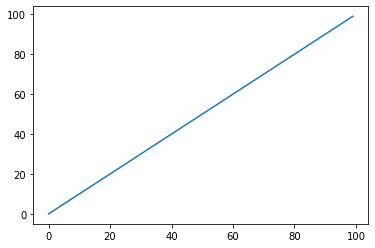

In [45]:
import matplotlib.pyplot as plt

plt.plot(y)

In [46]:
rd = np.random.randint(-15,15, 100)
y = y + rd
y

array([ -3,   1,   8, -12,  -8,  17,  -6,  -1,   2,  13,  16,  14,   1,
        21,   5,  24,  25,  14,  29,   5,  11,  13,  30,  22,  33,  27,
        16,  37,  26,  22,  24,  36,  36,  34,  38,  25,  36,  37,  23,
        42,  28,  50,  44,  47,  58,  49,  50,  46,  40,  34,  36,  45,
        62,  38,  49,  60,  64,  45,  54,  62,  68,  74,  49,  48,  49,
        54,  72,  57,  59,  62,  75,  73,  72,  62,  68,  70,  87,  86,
        64,  65,  72,  75,  92,  71,  75,  93,  82,  86,  91, 101,  75,
        90,  80,  99,  91, 105,  91, 102,  94,  88])

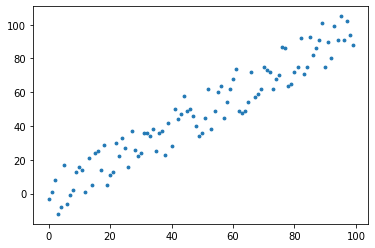

In [47]:
x = np.arange(100)
plt.scatter(x, y, s=8)

In [48]:
x_train = x[:80]
y_train = y[:80]

x_test = x[-20:]
y_test = y[-20:]

In [49]:
x_train.shape   # (80,)

(80,)

In [50]:
x_train = x_train.reshape(-1, 1)

In [51]:
x_train.shape   # (80, 1)

(80, 1)

In [52]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [53]:
linreg.fit(x_train, y_train)

LinearRegression()

In [54]:
linreg.coef_, linreg.intercept_

(array([0.96024379]), -0.32962962962962195)

In [55]:
linreg.predict(x_test.reshape(-1, 1))

array([76.48987342, 77.45011721, 78.41036099, 79.37060478, 80.33084857,
       81.29109236, 82.25133615, 83.21157993, 84.17182372, 85.13206751,
       86.0923113 , 87.05255509, 88.01279887, 88.97304266, 89.93328645,
       90.89353024, 91.85377403, 92.81401782, 93.7742616 , 94.73450539])

In [56]:
linreg.score(x_test.reshape(-1,1), y_test)

0.32248397967548326

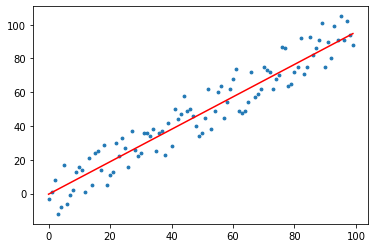

In [57]:
plt.scatter(x, y, s=8)

a = linreg.coef_
b = linreg.intercept_
y2 = a*x + b

plt.plot(x,y2,'r')

In [58]:
linreg.predict([[150],[200]])

array([143.70693858, 191.71912799])

## 기울기 0.5,  절편 20인 데이터셋 회귀분석

In [85]:
np.random.seed(0)
x = np.arange(100)
y = 0.5*x + 20
noise = np.random.randint(-10, 10, 100)
y2 = y + noise

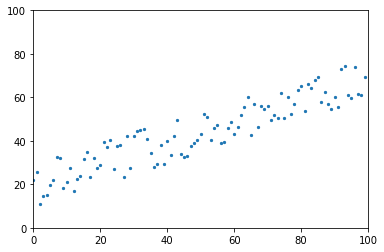

In [86]:
#plt.ylim(0,100)
plt.axis([0,100,0,100])
plt.scatter(x, y2, s=5)

In [87]:
x_train = x[:80]
x_test = x[-20:]

y_train = y2[:80]
y_test = y2[-20:]

In [88]:
X_train = x_train.reshape(-1, 1)
X_train.shape

(80, 1)

In [89]:
X_test = x_test.reshape(-1,1)
X_test.shape

(20, 1)

In [90]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [91]:
linreg.fit(X_train,y_train)

LinearRegression()

In [92]:
linreg.coef_, linreg.intercept_

(array([0.46897562]), 20.162962962962965)

In [93]:
linreg.score(X_test, y_test)

-0.06678507357980501

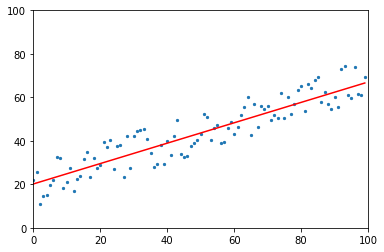

In [94]:
a = linreg.coef_
b = linreg.intercept_

pred_y = a*x + b

plt.axis([0,100,0,100])
plt.scatter(x, y2, s=5)
plt.plot(x, pred_y,'r')
plt.show()

In [95]:
linreg.predict([[1000]])

array([489.13858415])

In [126]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100, n_features=3, random_state=0, noise=10.0, bias=100.0
)

In [127]:
X.shape

(100, 3)

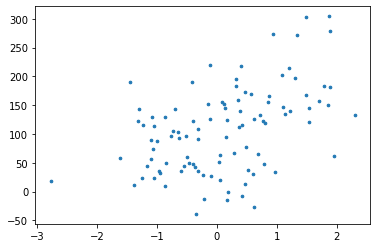

In [128]:
X[:,0]   # x1
plt.scatter(X[:,0], y, s=7)

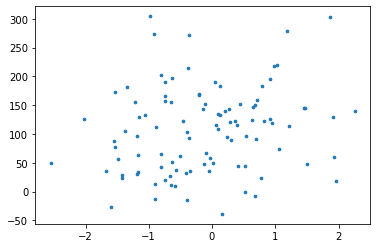

In [129]:
plt.scatter(X[:,1], y, s=7)

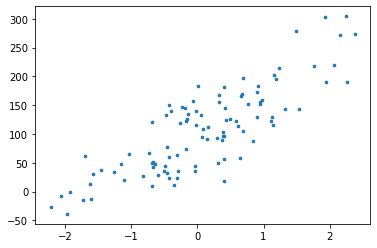

In [130]:
plt.scatter(X[:,2], y, s=7)

In [157]:
# 상관계수 : 
np.corrcoef(X[:,0], y)  # 0.46867824
np.corrcoef(X[:,1], y)  # 0.19036768
np.corrcoef(X[:,2], y)  # 0.83000816

array([[1.        , 0.83000816],
       [0.83000816, 1.        ]])

In [158]:
X_train = X[:80,:]
y_train = y[:80]

X_test = X[-20:,:]
y_test = y[-20:]

In [132]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression()

In [133]:
linreg.coef_, linreg.intercept_

(array([40.10623988,  7.55320588, 61.5175415 ]), 97.95603668916246)

In [134]:
linreg.score(X_test, y_test)

0.9824439177312566

In [159]:
w1 = linreg.coef_[0]
w2 = linreg.coef_[1]
w3 = linreg.coef_[2]
b = linreg.intercept_

pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b


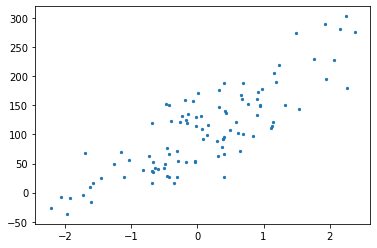

In [161]:
plt.scatter(X[:,2], pred_y, s=5)

In [163]:
linreg.predict(X_test[0, np.newaxis]), y_test[0]

(array([26.63441615]), 23.57301618394716)

In [164]:
linreg.predict(X_test[1, np.newaxis]), y_test[1]

(array([176.85515208]), 166.92141594525745)

In [165]:
linreg.predict(X_test[2, np.newaxis]), y_test[2]

(array([123.75440115]), 139.79157904926882)

In [166]:
X_test[0]

array([-1.25279536,  0.77749036, -0.4380743 ])

In [168]:
linreg.predict(X_test[0].reshape(-1,3))

array([26.63441615])

In [170]:
X_test[0, np.newaxis]

array([[-1.25279536,  0.77749036, -0.4380743 ]])

In [169]:
linreg.predict(X_test[0, np.newaxis])

array([26.63441615])

## 당뇨병에 대한 회귀분석

In [1]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [8]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes.data.shape   # (442, 10)
dir(diabetes)
diabetes.DESCR        # age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
diabetes.target.shape   # (442,)

(442,)

In [9]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, 
        columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
diabetes_df['target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [10]:
min(diabetes.target), max(diabetes.target)

(25.0, 346.0)

In [11]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [16]:
import matplotlib.pyplot as plt

bmi = diabetes_df['bmi']
target = diabetes_df['target']

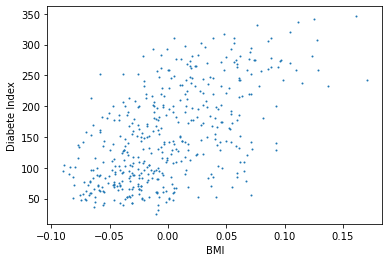

In [39]:
plt.xlabel('BMI')
plt.ylabel('Diabete Index')
plt.scatter(bmi, target, s=1)

In [21]:
X_train = bmi.to_numpy().reshape(-1,1)
X_train.shape

(442, 1)

In [22]:
linreg.fit(X_train, target)

LinearRegression()

In [24]:
linreg.coef_, linreg.intercept_

(array([949.43526038]), 152.1334841628967)

In [25]:
w = linreg.coef_
b = linreg.intercept_

In [27]:
import numpy as np
x = np.linspace(min(bmi), max(bmi), 100)
y = w*x + b

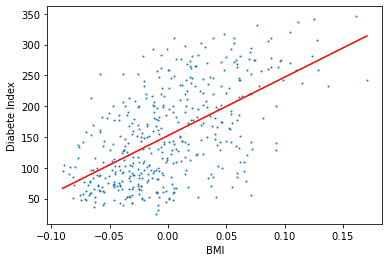

In [38]:
plt.xlabel('BMI')
plt.ylabel('Diabete Index')
plt.scatter(bmi, target, s=1)
plt.plot(x,y,'r')
plt.show()

In [31]:
linreg.score(X_train, target)

0.3439237602253803

In [35]:
linreg.predict(X_train[0,np.newaxis]), target[0]

(array([210.71003806]), 151.0)

In [40]:
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]

x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

In [41]:
# 다중회귀: 독립변수가 다수개인 경우
# 종속변수 1개

linreg.fit(x_train, y_train)

LinearRegression()

In [42]:
linreg.coef_, linreg.intercept_

(array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
        -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
         7.43519617e+02,  7.60951722e+01]),
 152.76430691633442)

In [43]:
linreg.score(x_test, y_test)

0.5850753022690574

In [44]:
linreg.predict(x_test[0, np.newaxis])

array([197.61846908])

## 학습된 모델을 파일에 저장하고 불러오기
* pickle 사용(dump, load)

In [45]:
import pickle

In [46]:
with open('linreg.pkl', 'wb') as fout:
    pickle.dump(linreg, fout)  # 직렬화하여 파일에 저장
print('학습된 모델을 파일에 저장성공!')

학습된 모델을 파일에 저장성공!


In [47]:
with open('linreg.pkl', 'rb') as fin:
    loaded_linreg = pickle.load(fin)
print('저장된 모델 로드 성공')

저장된 모델 로드 성공


In [48]:
loaded_linreg.predict(x_test[0, np.newaxis])

array([197.61846908])

## 2차함수 그래프에 노이즈 추가
* a*x^2 + b  (a=0.5, b=50)
* x: -4 ~ 4, 500개 실수
* y = a*x^2 + b
* noise : 정규분포(mean=0, std=2.5)

In [66]:
import numpy as np
noise = np.random.normal(0, 2.5, 500)
x = np.linspace(-4, 4, 500)
a = 0.5
b = 50
_y = a*x**2 + b
y = _y + noise

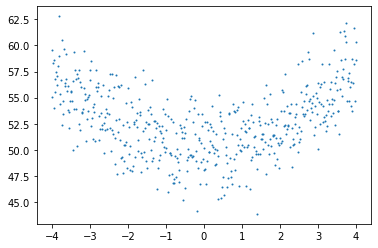

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=1)

## 곡선을 따라 분포된 데이터를 선형회귀로 분석하는 경우

In [69]:
# 선형회귀 분석
from sklearn.linear_model import LinearRegression

X_train = x[:-50].reshape(-1,1)
X_test = x[-50:].reshape(-1,1)

y_train = y[:-50]
y_test = y[-50:]

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 1), (50, 1), (450,), (50,))

In [73]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
linreg.coef_, linreg.intercept_

(array([-0.33107278]), 52.1674297464253)

In [77]:
a = linreg.coef_
b = linreg.intercept_
pred_y = a*x + b

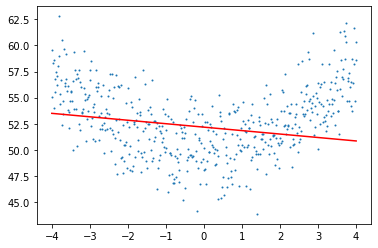

In [79]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=1)
plt.plot(x, pred_y, 'r')

In [81]:
linreg.score(X_test, y_test)

-4.306650508197897

## 다항회귀(Polynomial Regression)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [84]:
x_poly = poly.fit_transform(x.reshape(-1,1))
x_poly.shape

(500, 3)

In [96]:
X_train = x_poly[:-50,:]
X_test = x_poly[-50:,:]
y_train = y[:-50]
y_test = y[-50:]

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 3), (50, 3), (450,), (50,))

In [108]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [109]:
linreg.coef_, linreg.intercept_

(array([0.        , 0.04263587, 0.46620154]), 50.22026040402082)

In [110]:
# a*x^2 + 0.04263587*x + b
a = linreg.coef_[2]
b = linreg.intercept_

In [111]:
linreg.score(X_test, y_test)

0.16256997837407694

In [112]:
#linreg.predict(X_test)

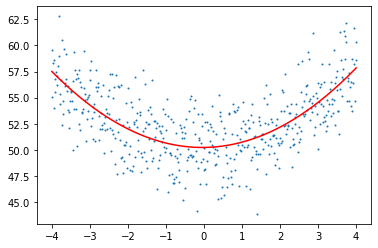

In [115]:
pred_y = a*x**2 + 0.04263587*x + b
#pred_y = a*x**2 + b

plt.scatter(x, y, s=1)
plt.plot(x, pred_y, 'r')